# Extreme Heat Events in New York City: A 40-Year Analysis (1984-2023)

###  Haoqi Zhang (AryaAvery)

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

#### The data are donwloaded from [ERA5 hourly data](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=download) of Climate Data Storage.

In [8]:
daily_max_temp_path = '/home/jovyan/rces-assignments/Project/final/daily_max.nc'
daily_max_temp = xr.open_dataset(daily_max_temp_path) - 273.15

# 1. Long-Term Temperature Trends

### Some conceptural words in this research are defined as follow: 
#### -High temprature: Daily Maximum Temprature ≥ 32.0℃ (89.6℉)
#### -Extreme High temprature: Daily Maximum Temprature ≥ 35.0℃ (95℉)
#### -Heat Wave Events: ≥ 2 days with temperature ≥ 32.0℃ (89.6℉)  for 1 June through 31 August

## 1.1 High Temprature Over the past 40 years

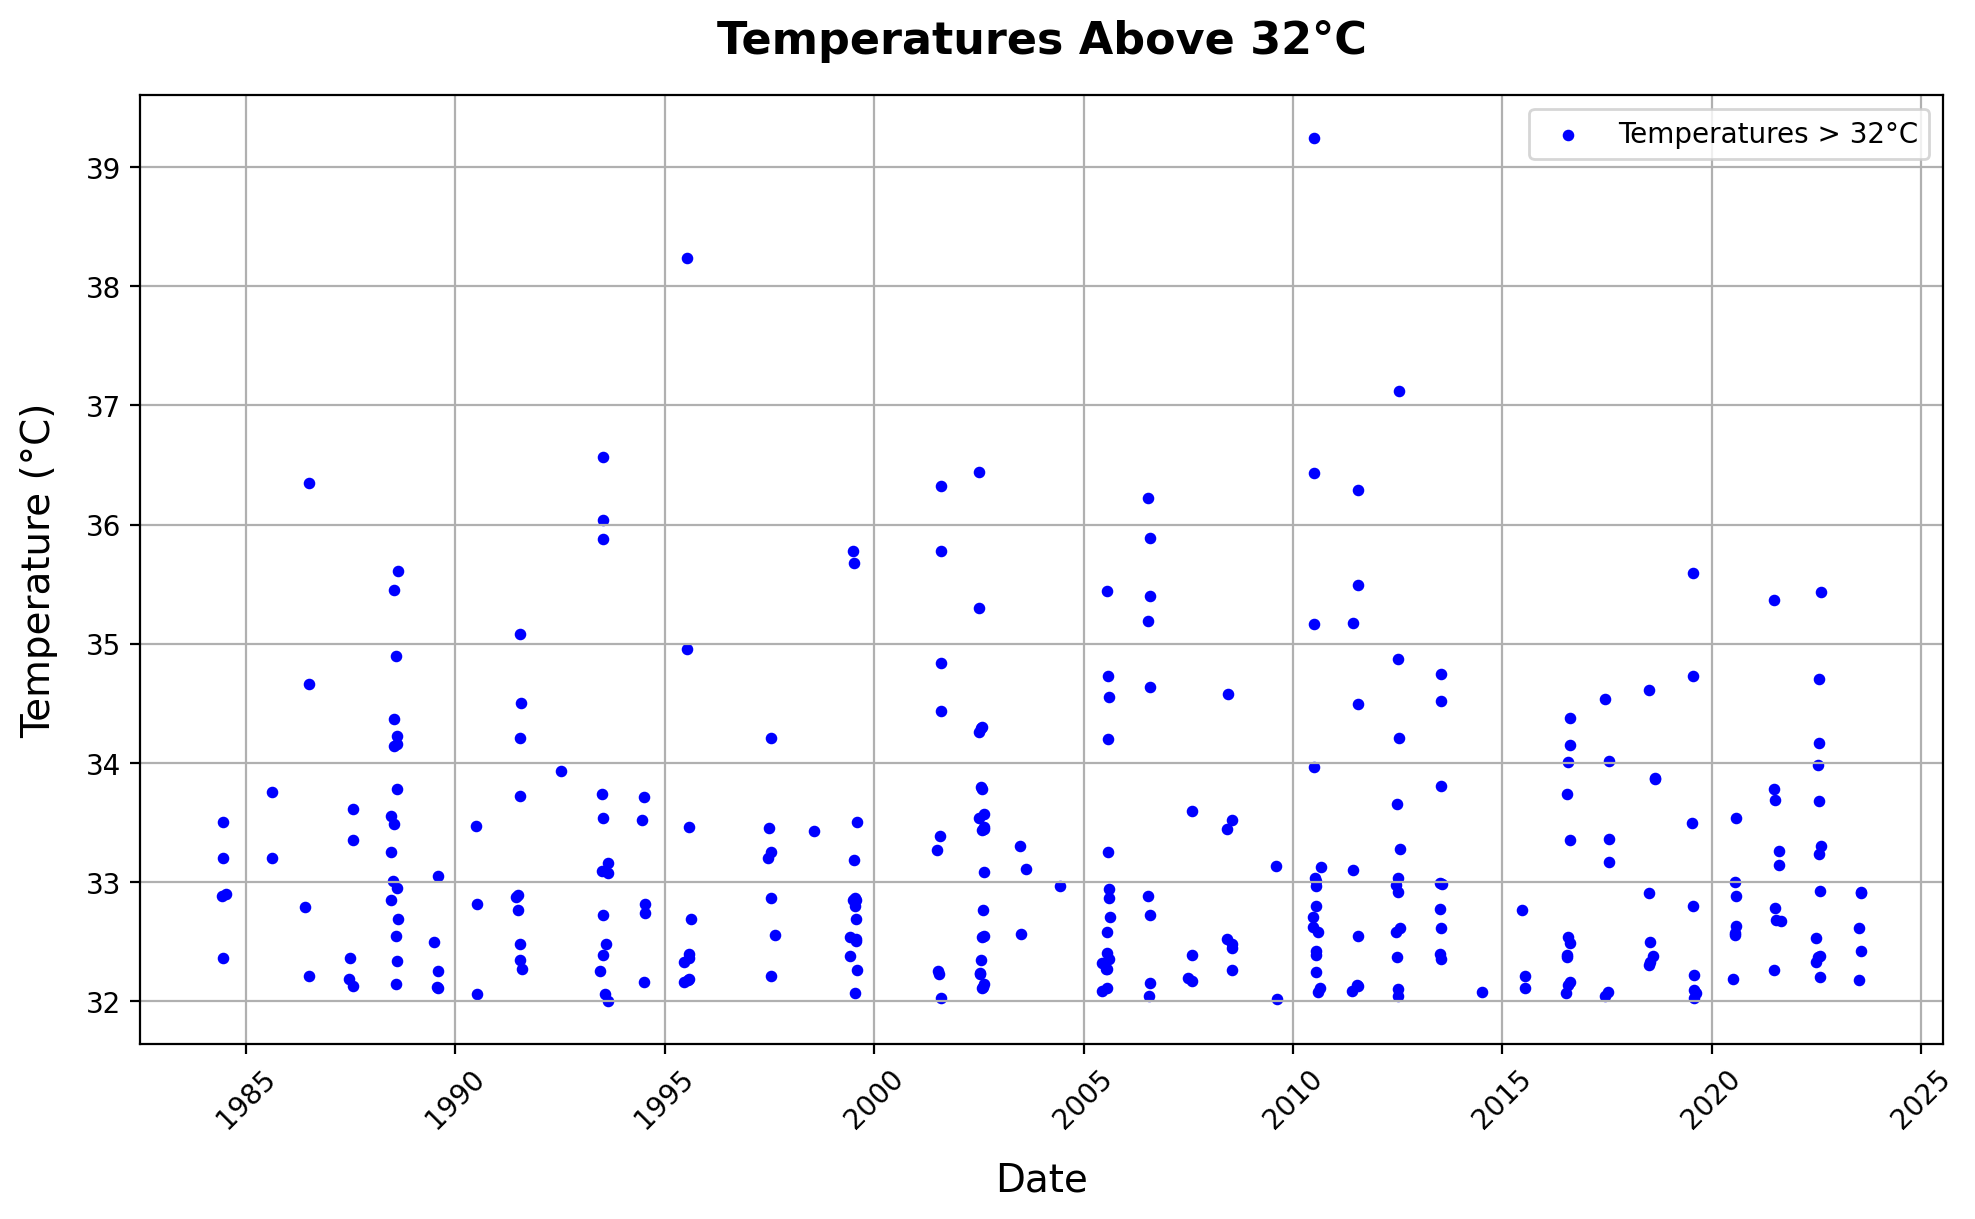

In [9]:
threshold = 32
high_temp_data = daily_max_temp['t2m'][daily_max_temp['t2m'] >= threshold]

dates = high_temp_data['time'].values
temperatures = high_temp_data.values

base_date = np.datetime64('1970-01-01')
dates_num = (dates - base_date).astype('timedelta64[D]').astype(int)  
"""
model = LinearRegression()
model.fit(dates_num.reshape(-1, 1), temperatures)

trend_line = model.predict(dates_num.reshape(-1, 1))
"""
plt.figure(figsize=(10, 6))
plt.scatter(dates, temperatures, color='blue', s=10, label='Temperatures > 32°C')
"""
plt.plot(dates, trend_line, color='red', linestyle='--', label='Trend Line')
"""
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Temperature (°C)', fontsize=14, labelpad=10)
plt.title('Temperatures Above 32°C', fontsize=16, fontweight="bold", pad=15)
plt.grid(True)

plt.tight_layout()
plt.xticks(rotation=45)
plt.legend()

<p style="font-size: 18px;">The scatter plot above illustrates daily high temperatures (≥ 32°C) recorded over the past 40 years. While there does not appear to be a clear increasing trend in the frequency of such high-temperature events, the most recent decade shows several occurrences of record-breaking temperatures. 

## 1.2 Annual High-Temperature Days and Heatwave Events

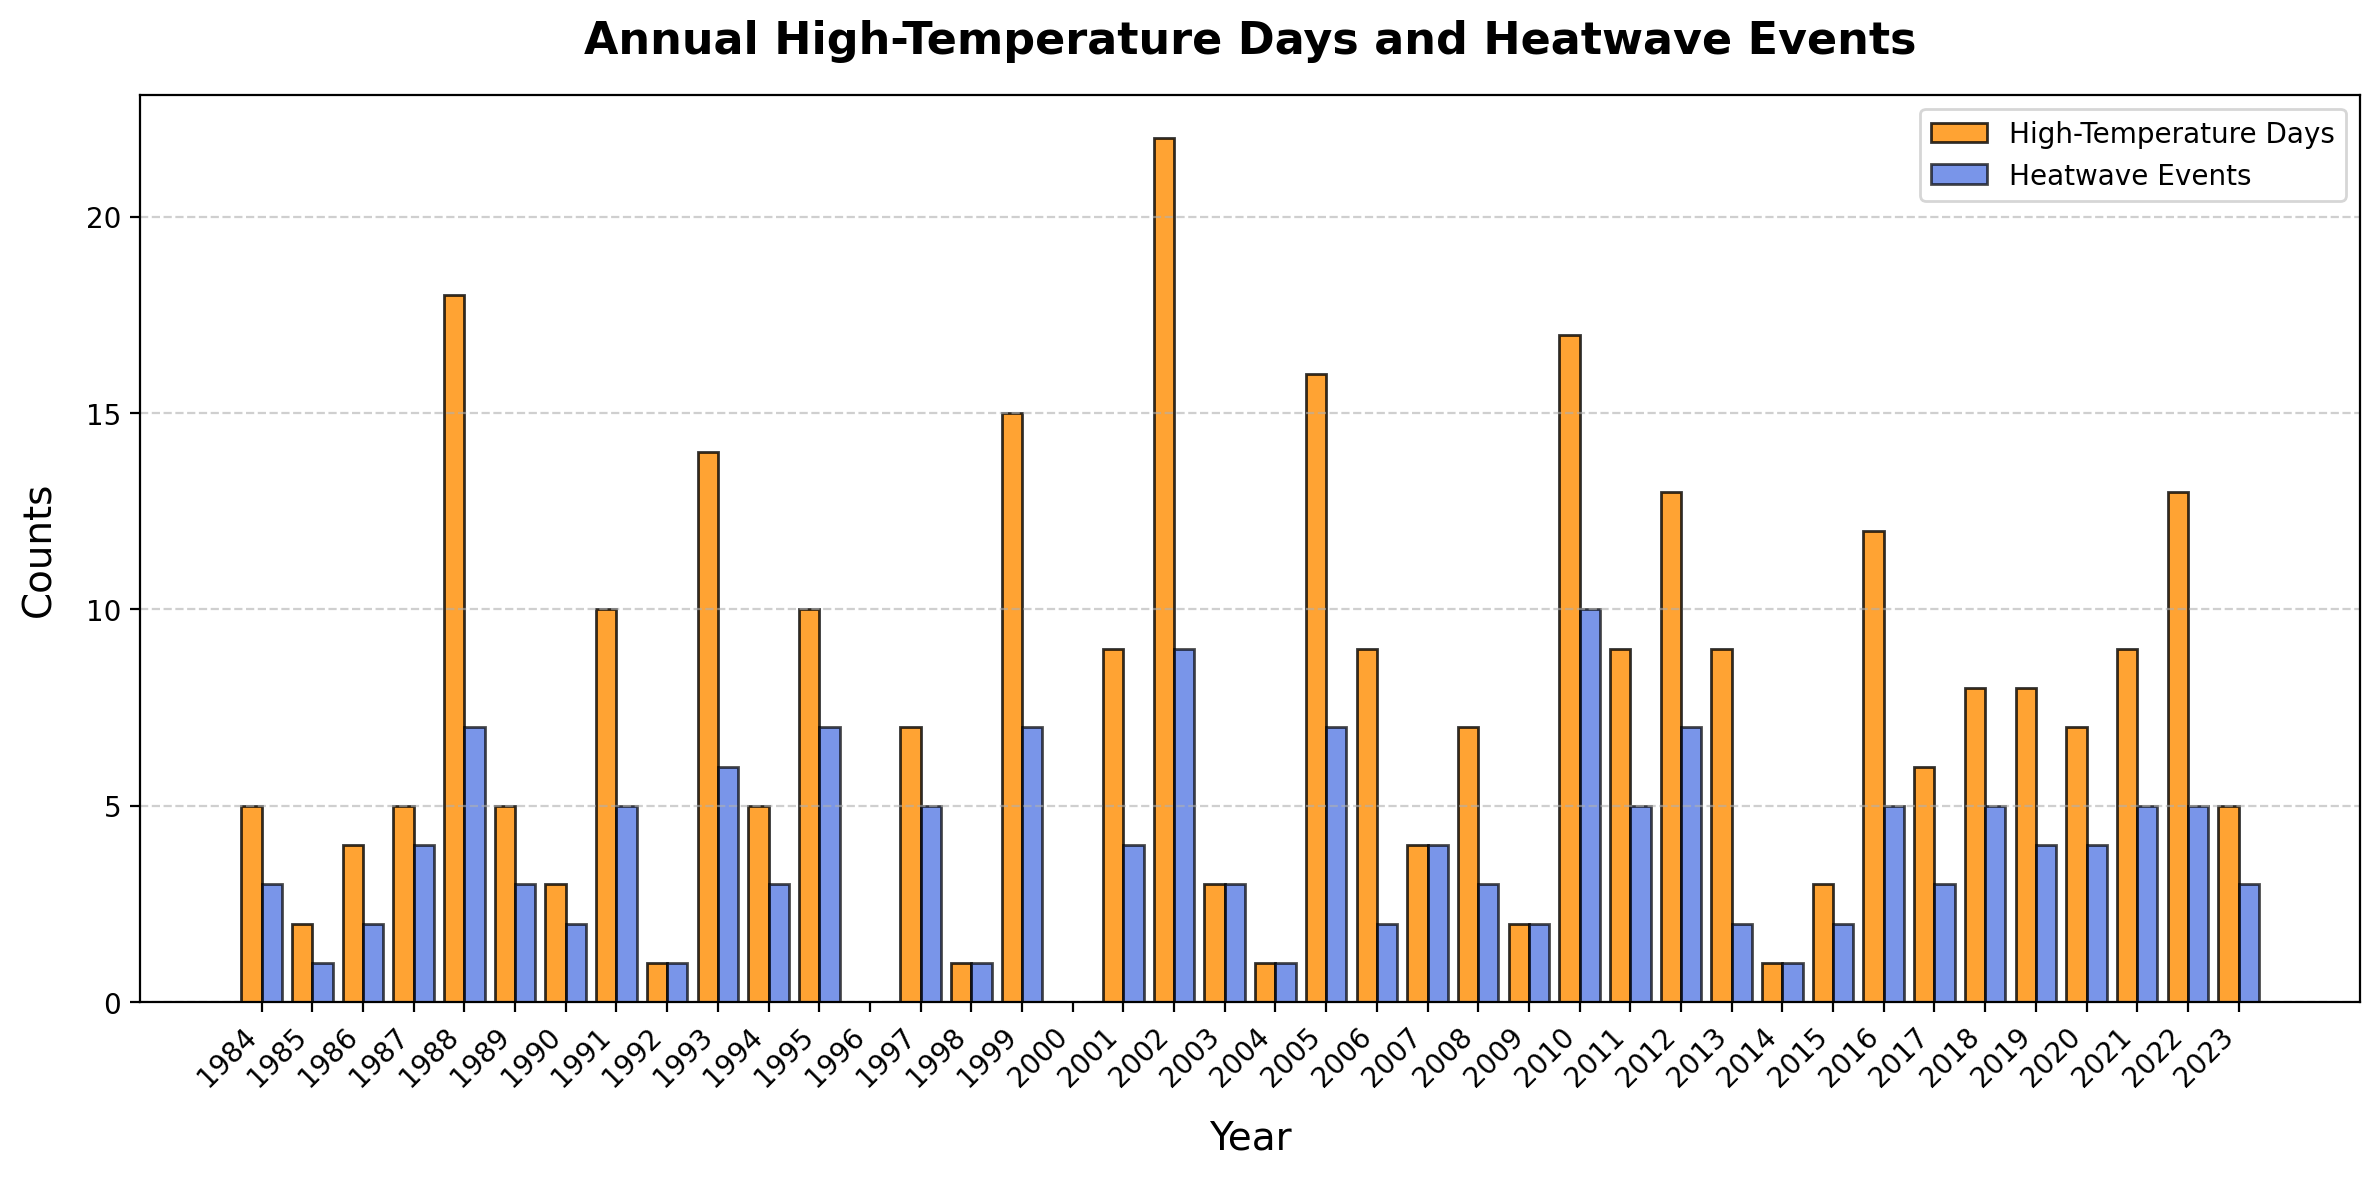

In [10]:
thresholds_per_year = 32
high_temp_days = (daily_max_temp['t2m'] >= thresholds_per_year).astype(int)

rolling_sum = high_temp_days.rolling(time=2).sum()  
heatwave_events = (rolling_sum >= 2).astype(int)    

heatwave_events = np.zeros_like(high_temp_days.values)

current_event = 0  
for i in range(len(high_temp_days)):
    if high_temp_days.values[i] == 1: 
        if i == 0 or high_temp_days.values[i - 1] == 0:  
            current_event += 1  
        heatwave_events[i] = current_event  
    else:
        heatwave_events[i] = 0  
        
heatwave_events_xr = xr.DataArray(
    heatwave_events,
    coords={'time': daily_max_temp['time'], 
            'year': daily_max_temp['time.year']},  
    dims=['time'],  
    name='heatwave_events'
)


def count_unique_events(x):
    return xr.DataArray(
        len(np.unique(x.values[x.values > 0])),
        coords={'year': [int(x['year'].values[0])]},  
        dims=['year'] 
    )


unique_heatwaves_per_year = heatwave_events_xr.groupby("year").apply(count_unique_events)


heatwave_counts = unique_heatwaves_per_year.values
years = unique_heatwaves_per_year.coords["year"].values

high_temp_days_per_year = high_temp_days.groupby("time.year").sum()
high_temp_days_counts = high_temp_days_per_year.values 

bar_width = 0.4

plt.figure(figsize=(12, 6))

index = np.arange(len(years))

plt.bar(index - bar_width/2, high_temp_days_counts, bar_width, 
        color="darkorange", edgecolor="black", alpha=0.8, 
        label="High-Temperature Days")

plt.bar(index + bar_width/2, heatwave_counts, bar_width, 
        color="royalblue", edgecolor="black", alpha=0.7, 
        label="Heatwave Events")

plt.xticks(index, years, rotation=45, ha='right')

plt.xlabel("Year",fontsize=14, labelpad=10)
plt.ylabel("Counts", fontsize=14, labelpad=10)
plt.title("Annual High-Temperature Days and Heatwave Events", fontsize=16, fontweight="bold", pad=15)

plt.legend()

plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()

<p style="font-size: 18px;">The bar chart illustrates the annual count of high-temperature days (≥32°C) and heatwave events over the past 40 years. High-temperature days (orange bars) exhibit considerable interannual variability, with certain years, such as 1988, 2002, and 2010, experiencing notably high counts. Heatwave events (blue bars) also show variability. Though the trends are not very pronounced, the years with high counts of high-temperature days and events need further investigation below.

## 1.3 Annual Days Above 21.1°C Dewpoint Temprature

<p style="font-size: 18px;"> When the dewpoint temperature exceeds 21.1°C (70°F), it creates an uncomfortable and oppressive sensation, as the air becomes highly humid and sticky.

In [18]:
dewpoint_max_temp_path = '/home/jovyan/rces-assignments/Project/final/dewpoint_max_temp.nc'
dewpoint_max_temp = xr.open_dataset(dewpoint_max_temp_path) - 273.15
print(f"\n dewpoint_temp:\n{dewpoint_max_temp}")


 dewpoint_temp:
<xarray.Dataset> Size: 176kB
Dimensions:    (time: 14702)
Coordinates:
    number     int64 8B ...
    step       timedelta64[ns] 8B ...
    surface    float64 8B ...
    latitude   float64 8B ...
    longitude  float64 8B ...
  * time       (time) datetime64[ns] 118kB 1984-06-01 1984-06-02 ... 2024-08-31
Data variables:
    d2m        (time) float32 59kB 8.046 9.961 11.08 11.85 ... 19.25 16.29 18.63
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-29T20:57 GRIB to CDM+CF via cfgrib-0.9.1...


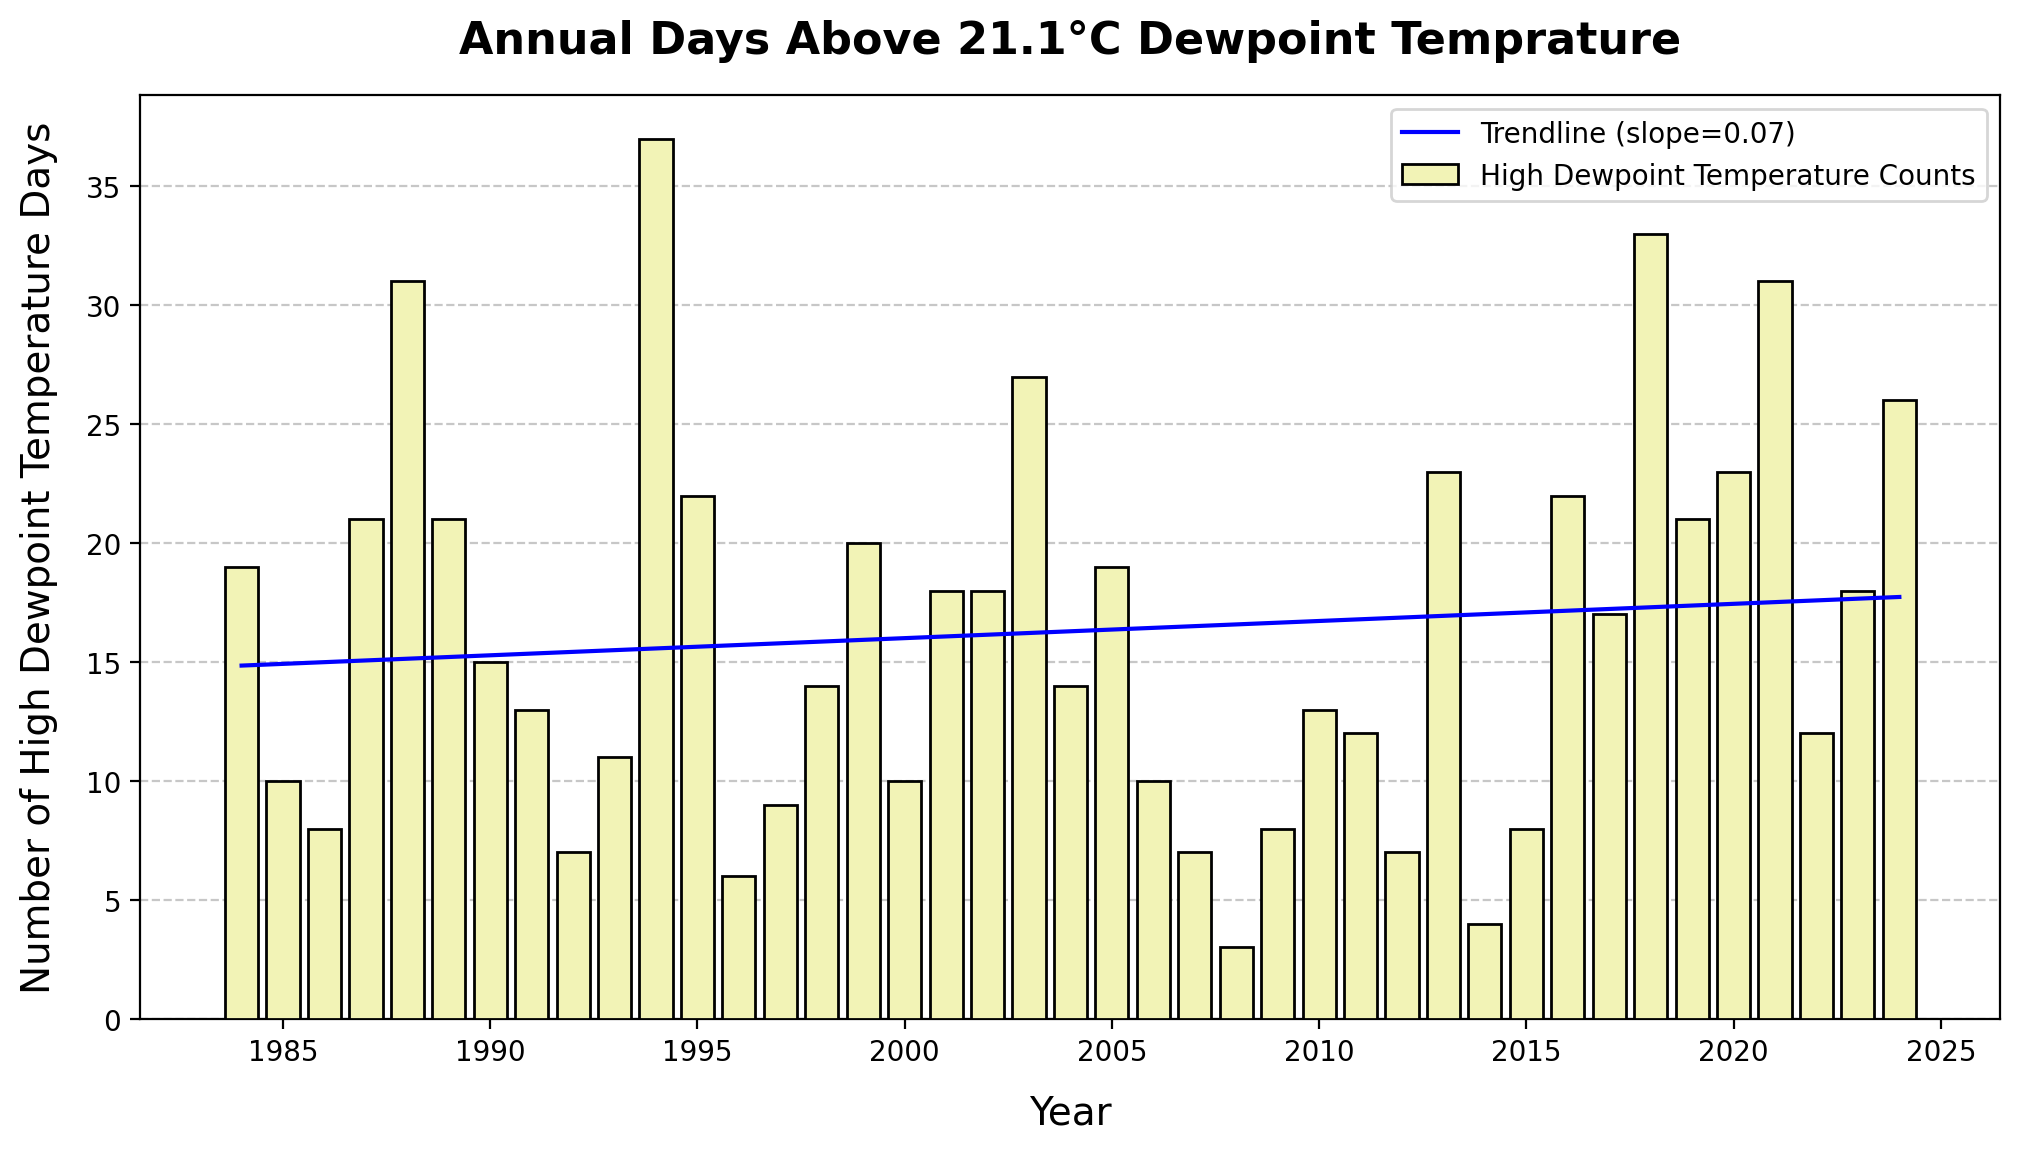

In [12]:
dewpoint_threshold = 21.1
high_dew_days = dewpoint_max_temp['d2m'] > dewpoint_threshold
   
high_dew_counts = high_dew_days.groupby('time.year').sum().values

years24 = dewpoint_max_temp['d2m'].groupby(dewpoint_max_temp['time.year']).max(dim='time')
years24 = years24 ['year'].values

slope_high, intercept_high, r_value, p_value, std_err = linregress(years24, high_dew_counts)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(years24, high_dew_counts, color="#F2F3B6", edgecolor="black", label="High Dewpoint Temperature Counts", zorder = 3)
ax.plot(years24, slope_high * years24 + intercept_high, color="blue",  label=f"Trendline (slope={slope_high:.2f})", zorder = 3)
ax.set_xlabel("Year",  fontsize=14, labelpad=10)
ax.set_ylabel("Number of High Dewpoint Temperature Days",  fontsize=14, labelpad=10)
ax.set_title(f"Annual Days Above {dewpoint_threshold}°C Dewpoint Temprature", fontsize=16, fontweight="bold", pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder = 0)
# Display the legend
ax.legend()

<p style="font-size: 18px;">The bar chart depicts the annual number of days with a dewpoint temperature above 21.1°C from 1984 to 2024, along with a trendline indicating a slight upward trend (slope = 0.07). Although the overall increase is modest, the trendline suggests a potential rise in the frequency of high-dewpoint days, which may contribute to increased discomfort during summer months. 

# 2. Seasonal Heat Characteristics

## 2.1 High Temperature Days in Summer Months

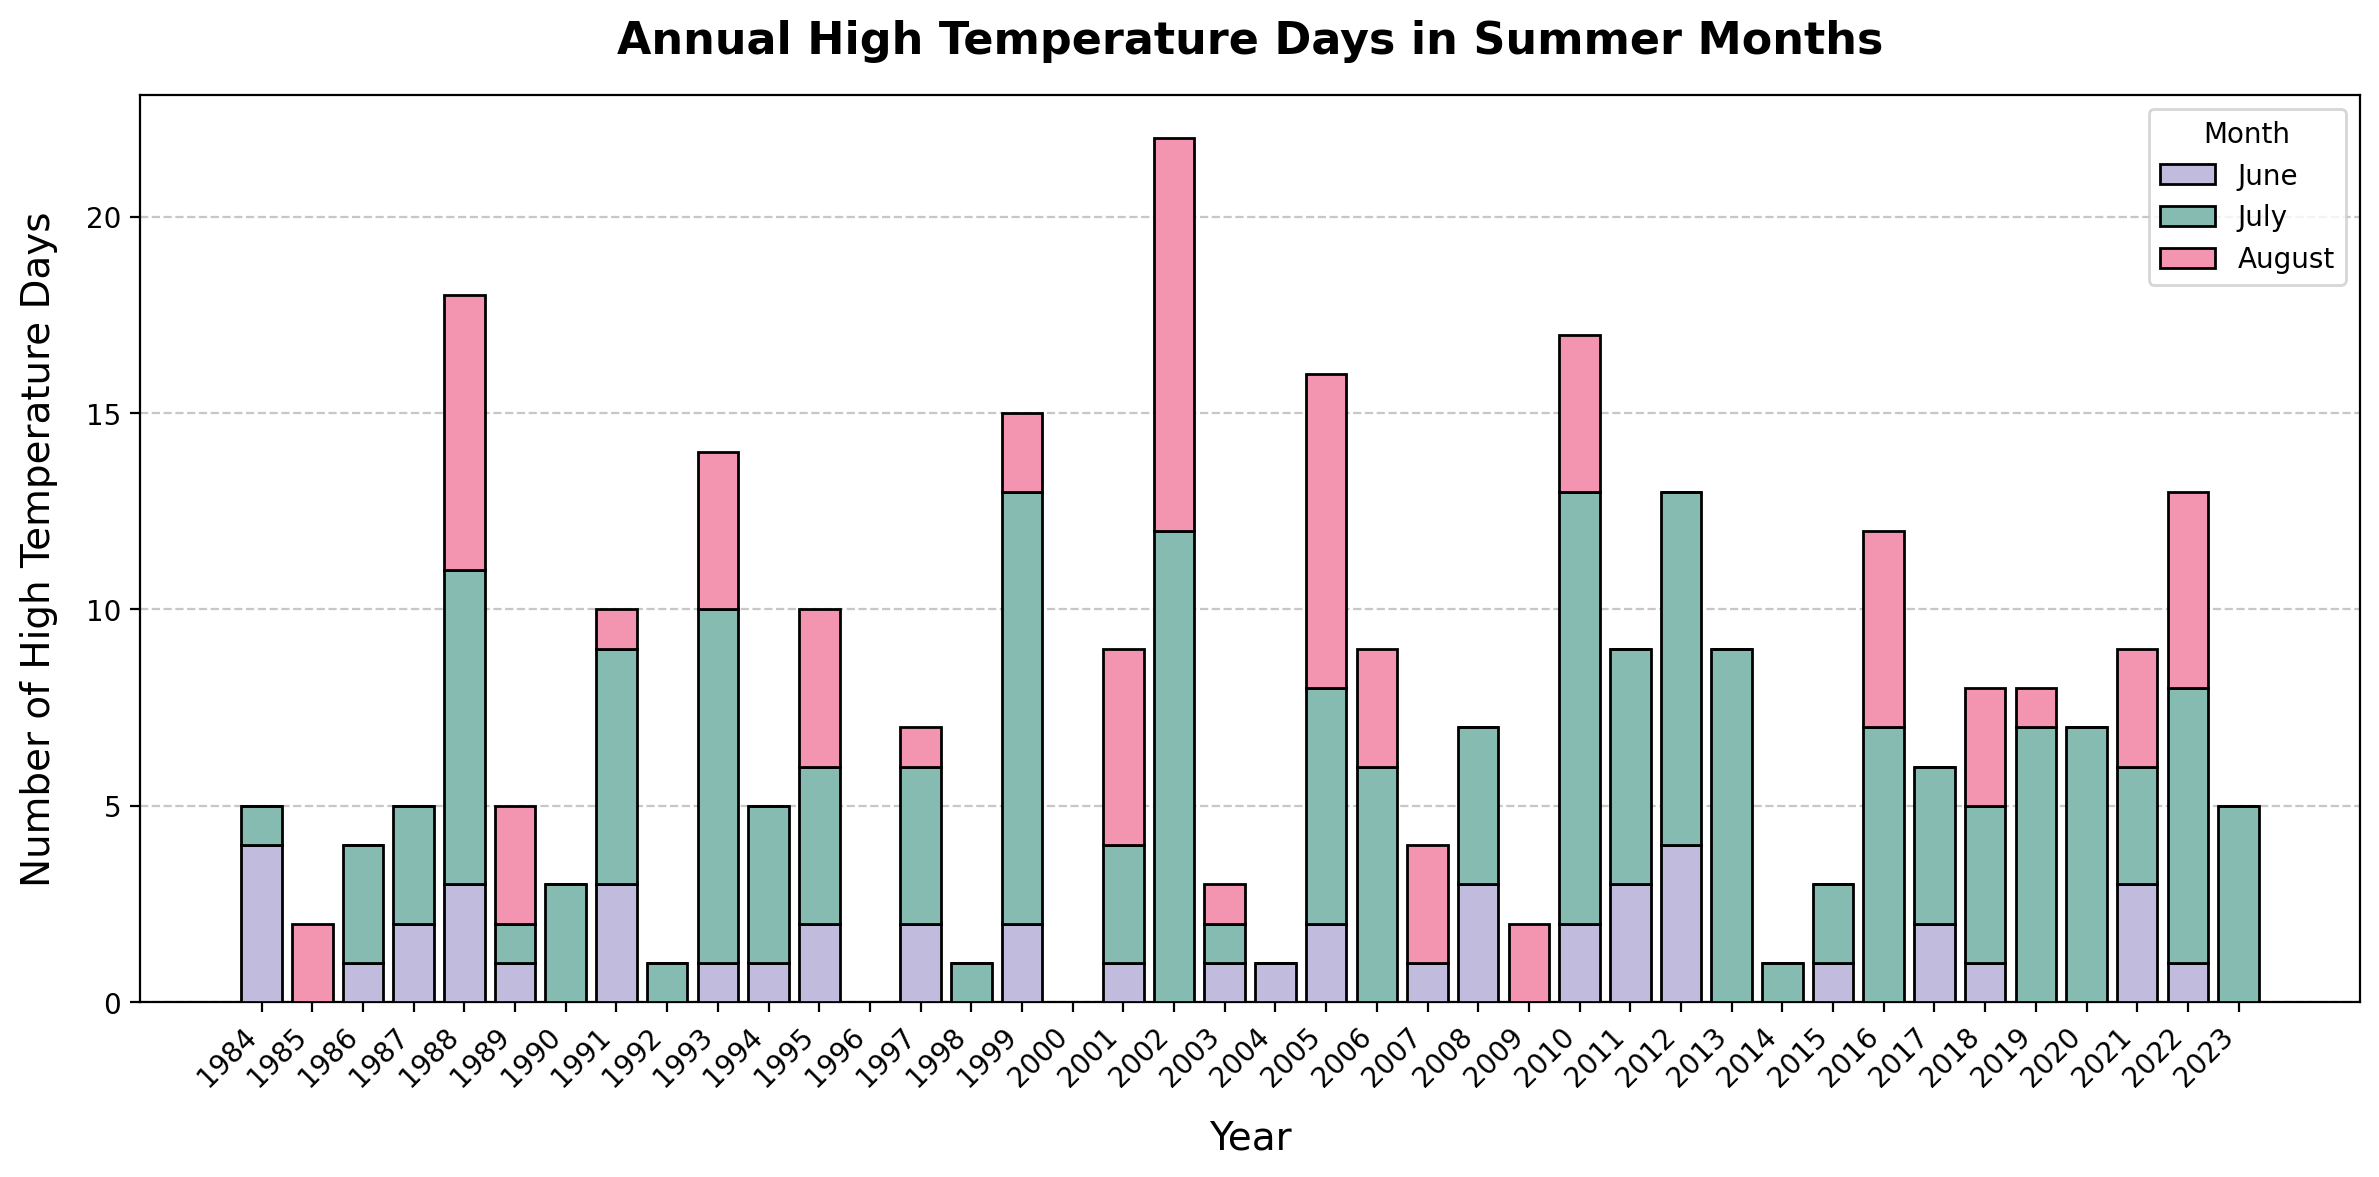

In [16]:
summer_months = [6, 7, 8]
summer_high_temp_days = high_temp_days.sel(time=high_temp_days['time.month'].isin(summer_months))

# Group by year and month, then sum
monthly_summer_high_temp_days = summer_high_temp_days.groupby("time.year").sum()

# Prepare data for plotting
years = monthly_summer_high_temp_days['year'].values
june_days = summer_high_temp_days.sel(time=summer_high_temp_days['time.month'] == 6).groupby("time.year").sum()
july_days = summer_high_temp_days.sel(time=summer_high_temp_days['time.month'] == 7).groupby("time.year").sum()
august_days = summer_high_temp_days.sel(time=summer_high_temp_days['time.month'] == 8).groupby("time.year").sum()

# Create the plot
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(years))
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder = 0)
plt.bar(index, june_days, label='June', edgecolor="black", color=(193/255, 187/255, 221/255), zorder = 3)
plt.bar(index, july_days, bottom=june_days, label='July',edgecolor="black", color=(134/255, 187/255, 177/255), zorder = 3)
plt.bar(index, august_days, bottom=june_days+july_days,label='August', edgecolor="black",color=(243/255, 149/255, 176/255), zorder = 3)

plt.title(('Annual High Temperature Days in Summer Months'), fontsize=16, fontweight="bold", pad=15)
plt.xlabel('Year',  fontsize=14, labelpad=10)
plt.ylabel('Number of High Temperature Days',  fontsize=14, labelpad=10)
plt.xticks(index, years, rotation=45, ha='right')
plt.legend(title='Month')

plt.tight_layout()

<p style="font-size: 18px;">The chart shows the 40-year trend of high-temperature days during the summer months (June, July, and August), with July accounting for the highest percentage of hot days overall.

## 2.2 High Temperature Days Distribution in Summer Months

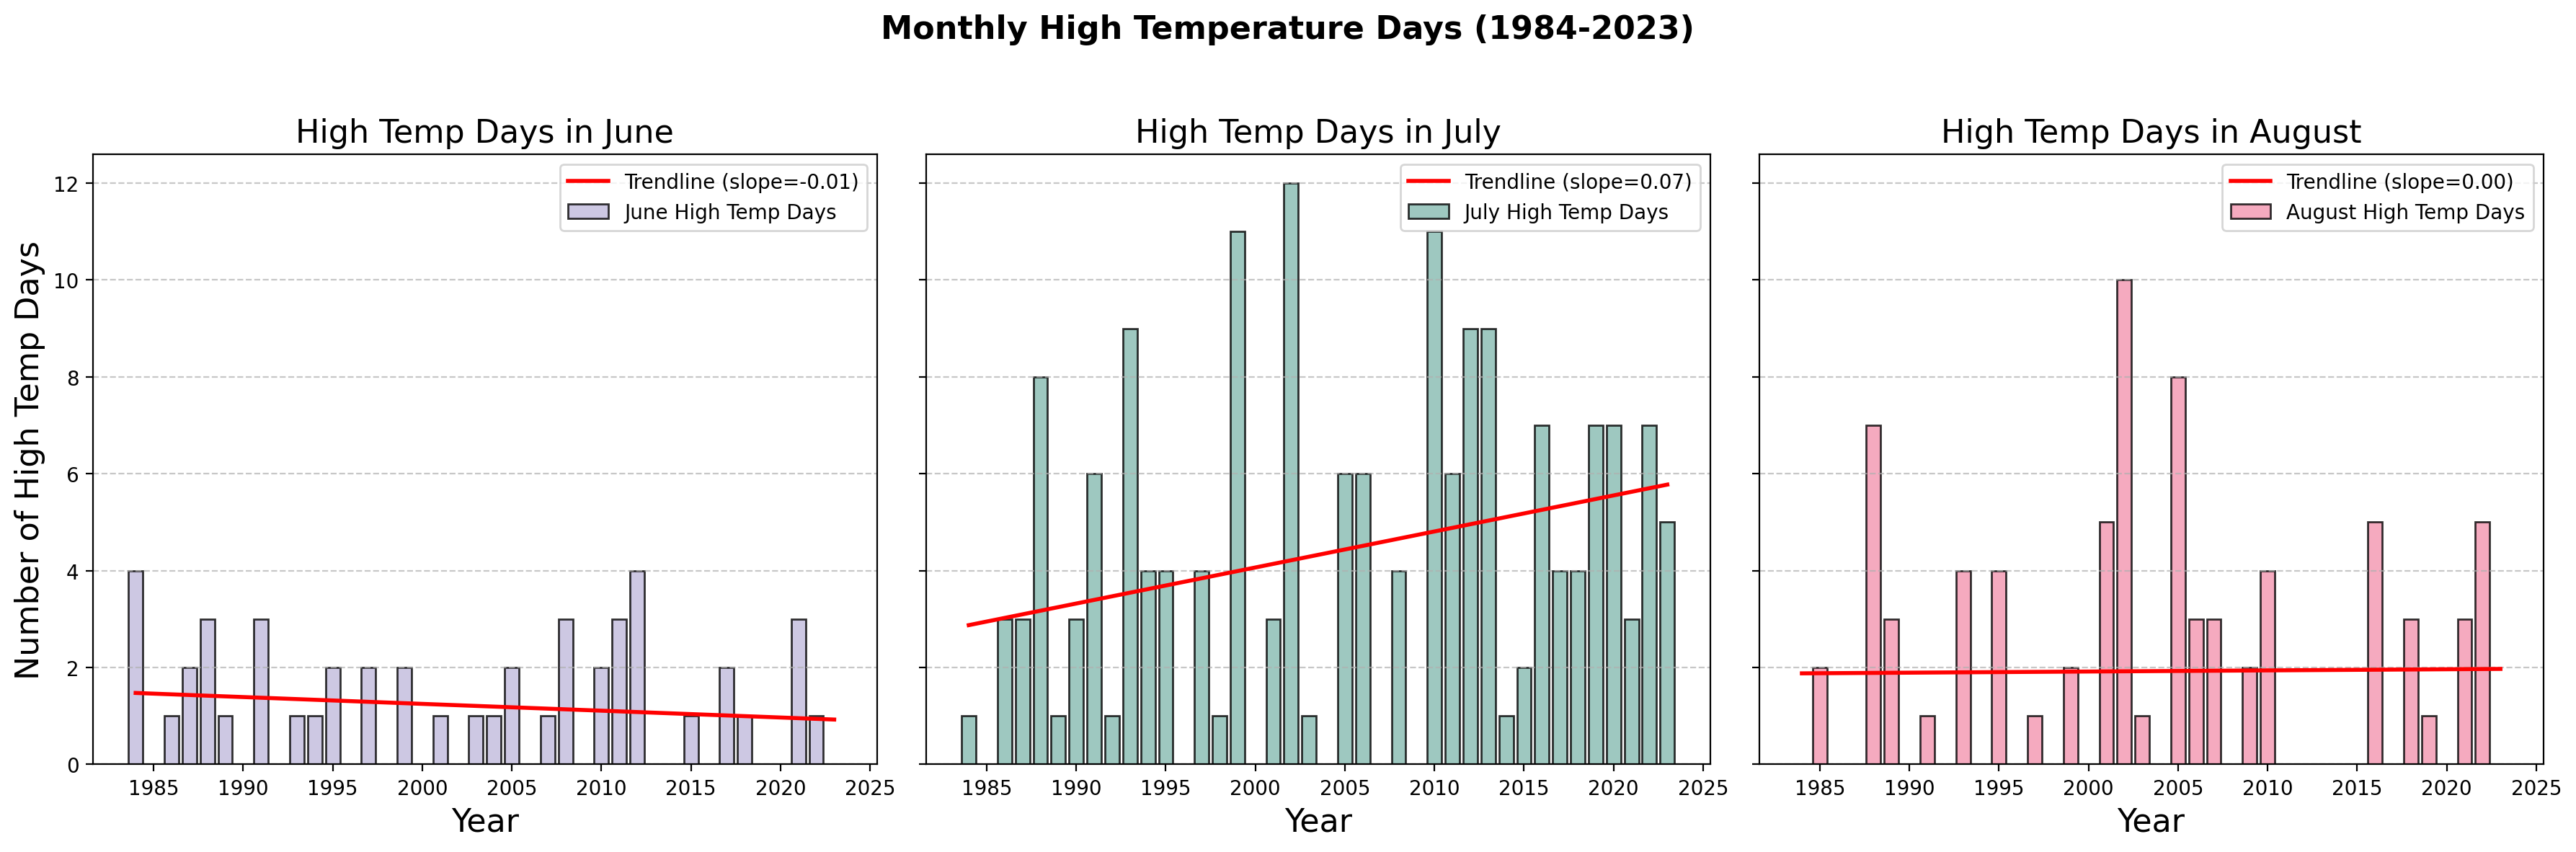

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

colors = [(193/255, 187/255, 221/255), (134/255, 187/255, 177/255), (243/255, 149/255, 176/255)]
june = high_temp_days.sel(time=high_temp_days['time.month'] == 6)
june_high_temp_days = june.groupby("time.year").sum()
july = high_temp_days.sel(time=high_temp_days['time.month'] ==7)
july_high_temp_days = july.groupby("time.year").sum()
august = high_temp_days.sel(time=high_temp_days['time.month'] ==8)
august_high_temp_days = august.groupby("time.year").sum()

axes[0].bar(years, june_high_temp_days, color=colors[0], alpha=0.8, label='June High Temp Days',edgecolor="black")
z_june = np.polyfit(years, june_high_temp_days, 1)
p_june = np.poly1d(z_june)
axes[0].plot(years, p_june(years), color='red', linewidth=2, label=f'Trendline (slope={z_june[0]:.2f})')
axes[0].set_title('High Temp Days in June', fontsize=16)
axes[0].set_xlabel('Year',fontsize=16)
axes[0].set_ylabel('Number of High Temp Days',fontsize=16)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(years, july_high_temp_days, color=colors[1], alpha=0.8, label='July High Temp Days',edgecolor="black")
z_july = np.polyfit(years, july_high_temp_days, 1)
p_july = np.poly1d(z_july)
axes[1].plot(years, p_july(years), color='red', linewidth=2, label=f'Trendline (slope={z_july[0]:.2f})')
axes[1].set_title('High Temp Days in July', fontsize=16)
axes[1].set_xlabel('Year',fontsize=16)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

axes[2].bar(years, august_high_temp_days, color=colors[2], alpha=0.8, label='August High Temp Days', edgecolor="black")
z_august = np.polyfit(years, august_high_temp_days, 1)
p_august = np.poly1d(z_august)
axes[2].plot(years, p_august(years), color='red', linewidth=2, label=f'Trendline (slope={z_august[0]:.2f})')
axes[2].set_title('High Temp Days in August', fontsize=16)
axes[2].set_xlabel('Year', fontsize=16)
axes[2].legend()
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle('Monthly High Temperature Days (1984-2023)', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])


<p style="font-size: 18px;">July shows an increasing trend in high-temperature days over the past 40 years, while June has slightly decreased, and August has remained stable. This indicates that July has become progressively hotter in recent years.

# 3. Historical Temperature Extremes

## 3.1 Comparison of Historical Highest and Lowest Temperatures

In [4]:
winter_min_temp_path = '/home/jovyan/rces-assignments/Project/final/winter_temp.nc'
winter_min_temp = xr.open_dataset(winter_min_temp_path) - 273.15
print(f"\n winter_min_temp:\n{winter_min_temp}")


 winter_min_temp:
<xarray.Dataset> Size: 176kB
Dimensions:    (time: 14670)
Coordinates:
    number     int64 8B ...
    step       timedelta64[ns] 8B ...
    surface    float64 8B ...
    latitude   float64 8B ...
    longitude  float64 8B ...
  * time       (time) datetime64[ns] 117kB 1984-01-01 1984-01-02 ... 2024-02-29
Data variables:
    t2m        (time) float32 59kB -6.232 -2.908 -1.799 ... 2.256 10.66 0.0242
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-30T04:02 GRIB to CDM+CF via cfgrib-0.9.1...


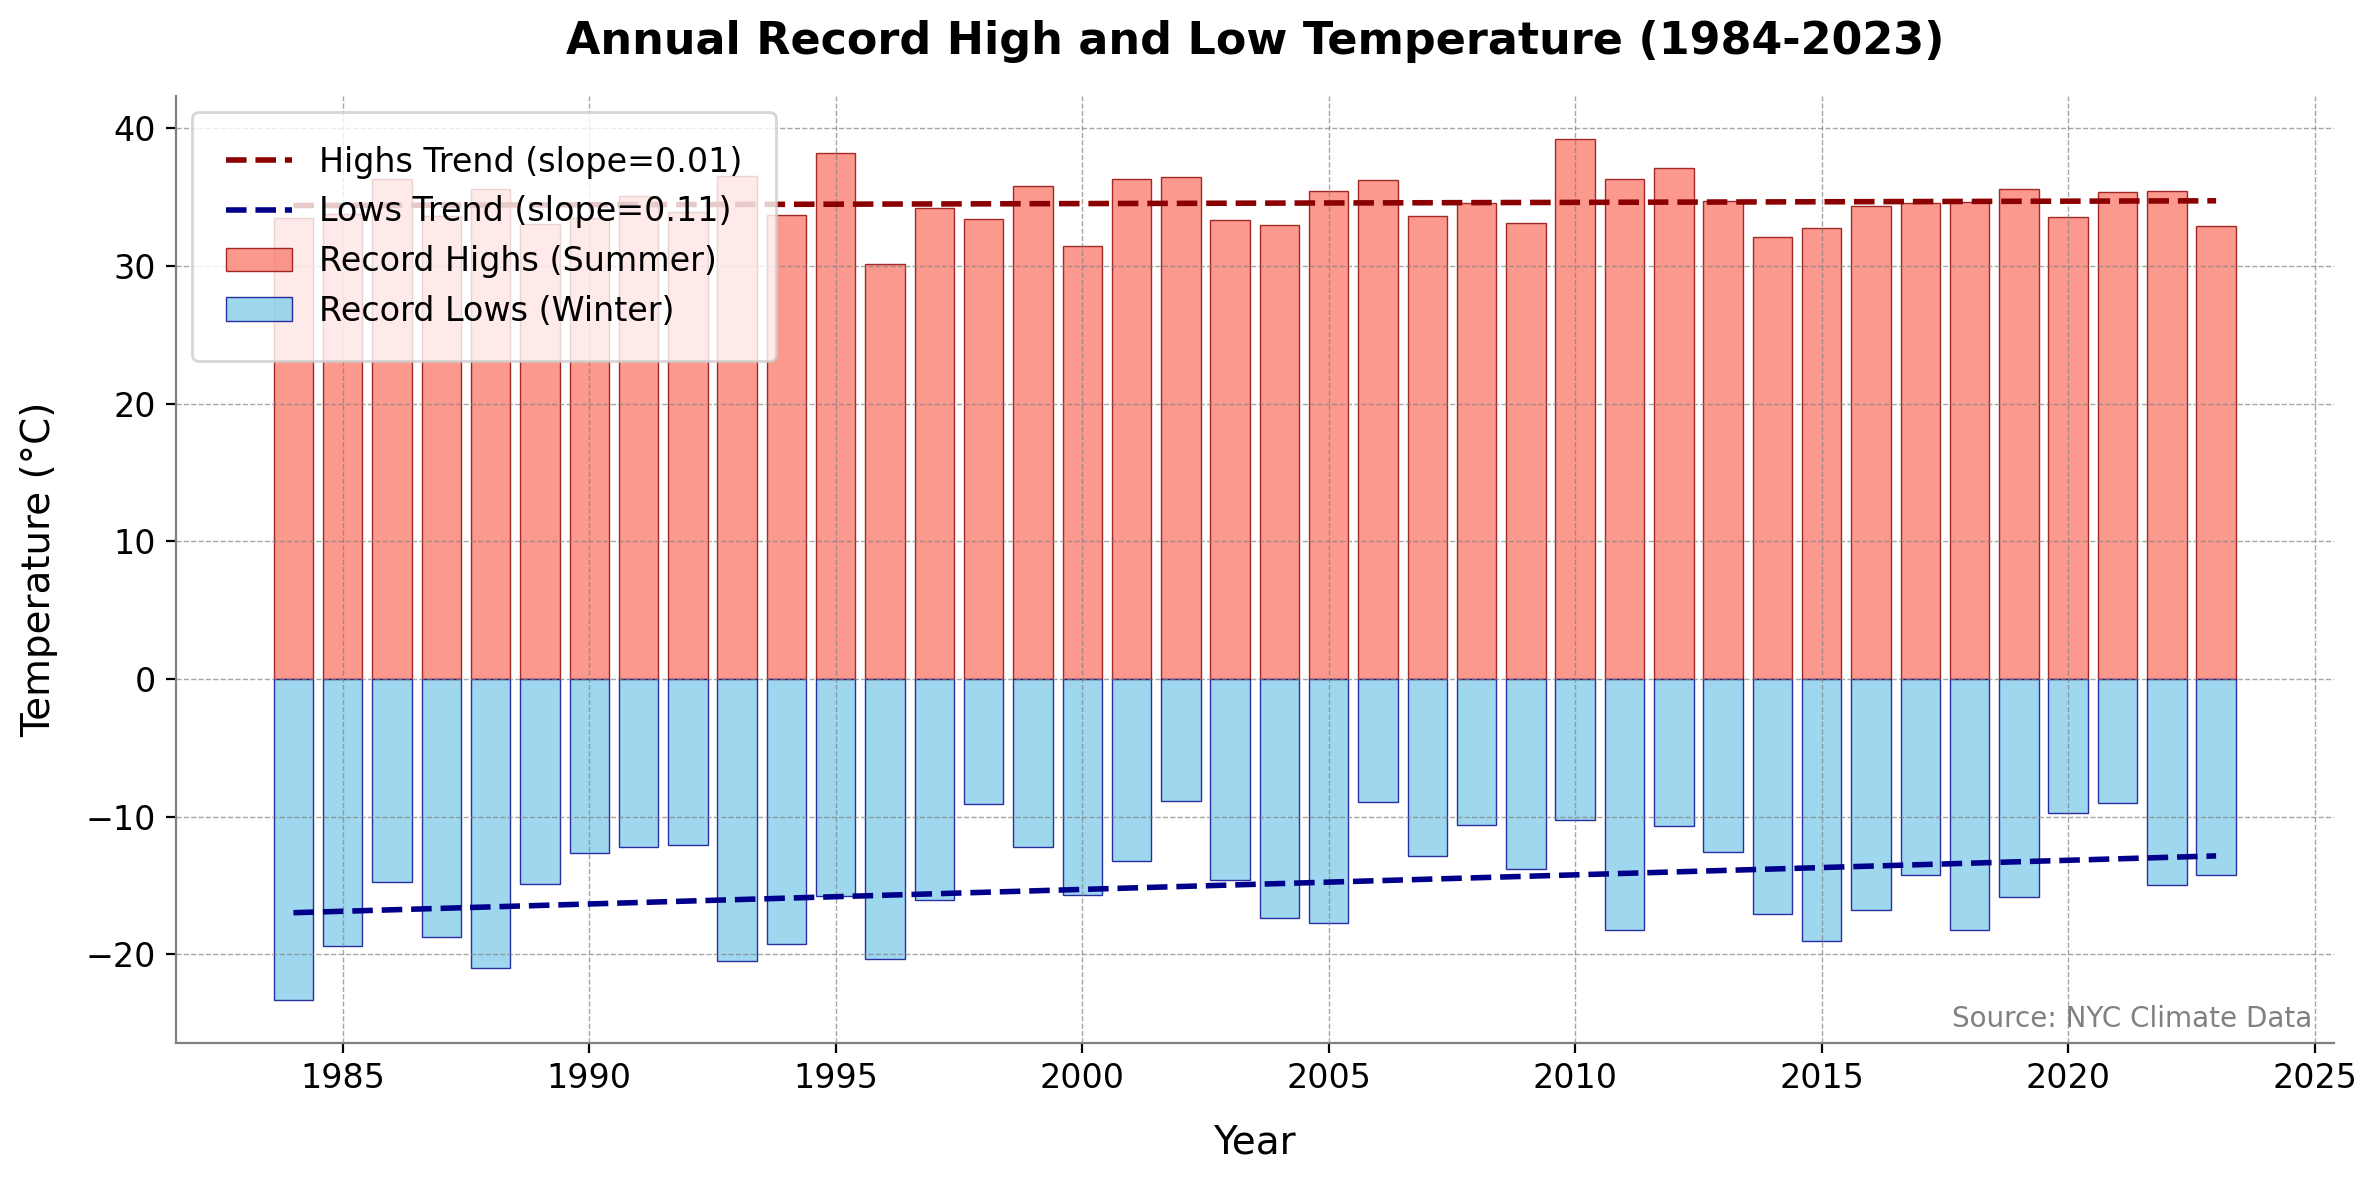

In [14]:
summer_temps = daily_max_temp['t2m']  
winter_temps = winter_min_temp['t2m']  

summer_max_by_year = summer_temps.groupby(summer_temps['time.year']).max(dim='time')

winter_min_by_year = winter_temps.groupby(winter_temps['time.year']).min(dim='time')

summer_years = summer_max_by_year['year'].values
winter_years = winter_min_by_year['year'].values

common_years = set(summer_years).intersection(set(winter_years))

summer_filtered = summer_max_by_year.sel(year=list(common_years))
winter_filtered = winter_min_by_year.sel(year=list(common_years))

record_data = pd.DataFrame({
    "Year": summer_filtered['year'].values,
    "Record Highs (Summer)": summer_filtered.values,
    "Record Lows (Winter)": winter_filtered.values
})

years = record_data["Year"]
record_highs = record_data["Record Highs (Summer)"]
record_lows = record_data["Record Lows (Winter)"]

slope_high, intercept_high, _, _, _ = linregress(years, record_highs)
trend_high = slope_high * years + intercept_high

slope_low, intercept_low, _, _, _ = linregress(years, record_lows)
trend_low = slope_low * years + intercept_low

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(years, record_highs, color="salmon", label="Record Highs (Summer)", alpha=0.8, edgecolor="darkred", linewidth=0.5)
ax.bar(years, record_lows, color="skyblue", label="Record Lows (Winter)", alpha=0.8, edgecolor="darkblue", linewidth=0.5)

ax.plot(years, trend_high, color="darkred", linestyle="--", linewidth=2, label=f"Highs Trend (slope={slope_high:.2f})")
ax.plot(years, trend_low, color="darkblue", linestyle="--", linewidth=2, label=f"Lows Trend (slope={slope_low:.2f})")

ax.grid(visible=True, color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("gray")
ax.spines["bottom"].set_color("gray")

ax.set_title("Annual Record High and Low Temperature (1984-2023)", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Year", fontsize=14, labelpad=10)
ax.set_ylabel("Temperature (°C)", fontsize=14, labelpad=10)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
"""
for i, (high, low) in enumerate(zip(record_highs, record_lows)):
    ax.text(years[i], high + 0.5, f"{high:.1f}", ha="center", va="bottom", fontsize=10, color="darkred")
    ax.text(years[i], low - 0.5, f"{low:.1f}", ha="center", va="top", fontsize=10, color="darkblue")
"""

ax.annotate("Source: NYC Climate Data", xy=(0.99, 0.01), xycoords="axes fraction",
            fontsize=10, color="gray", ha="right", va="bottom")

ax.legend(loc="upper left", fontsize=12, frameon=True, fancybox=True, framealpha=0.8, borderpad=1)

plt.tight_layout()
plt.show()

<p style="font-size: 18px;">The graph shows that while the annual record high temperatures have remained relatively stable over the 1984-2023 period, the annual record low temperatures have exhibited an upward trend. This suggests that the region has experienced a warming trend, as record low temperatures have been increasing over time.

## 3.2 Representative Years High Temprature Characristic Analysis

In [14]:
#high temp consecutive
def calculate_consecutive_high_temps(daily_max_temp, threshold=32):
    years_to_calculate = [1988, 2002, 2010, 2022]
    yearly_results = {}

    for year in years_to_calculate:
        yearly_data = daily_max_temp['t2m'].sel(time=daily_max_temp['time.year'] == year)
        
        high_temp_flags = (yearly_data >= threshold).astype(int)
        
        diff = high_temp_flags.diff(dim='time', label='lower').fillna(0)  
        consecutive_days = (diff != 0).cumsum(dim='time')
        
        consecutive_days = consecutive_days.pad({'time': (1, 0)}, constant_values=0)
        
        consecutive_days = consecutive_days.assign_coords(time=high_temp_flags['time'])
        
        group_counts = high_temp_flags.groupby(consecutive_days).sum(dim='time')
        
        total_consecutive_high_temps = group_counts.where(group_counts > 1).sum().item()

        yearly_results[year] = total_consecutive_high_temps
        
        
        print(f"Year: {year}, Consecutive High-Temp Days: {total_consecutive_high_temps}")

    return yearly_results

result = calculate_consecutive_high_temps(daily_max_temp)
print(f"\nFinal Result:\n{result}")

Year: 1988, Consecutive High-Temp Days: 16.0
Year: 2002, Consecutive High-Temp Days: 18.0
Year: 2010, Consecutive High-Temp Days: 10.0
Year: 2022, Consecutive High-Temp Days: 11.0

Final Result:
{1988: 16.0, 2002: 18.0, 2010: 10.0, 2022: 11.0}


In [15]:
#extreme temp consecutive
def calculate_consecutive_high_temps(daily_max_temp, threshold=35):
  
    years_to_calculate = [1988, 2002, 2010, 2022]
    yearly_results = {}

    for year in years_to_calculate:
        yearly_data = daily_max_temp['t2m'].sel(time=daily_max_temp['time.year'] == year)
        
        high_temp_flags = (yearly_data >= threshold).astype(int)
        
        diff = high_temp_flags.diff(dim='time', label='lower').fillna(0)  
        consecutive_days = (diff != 0).cumsum(dim='time')
        
        consecutive_days = consecutive_days.pad({'time': (1, 0)}, constant_values=0)
        
        consecutive_days = consecutive_days.assign_coords(time=high_temp_flags['time'])
        
        
        group_counts = high_temp_flags.groupby(consecutive_days).sum(dim='time')
        
        total_consecutive_high_temps = group_counts.where(group_counts > 1).sum().item()
        
        yearly_results[year] = total_consecutive_high_temps
        
        print(f"Year: {year}, Consecutive High-Temp Days: {total_consecutive_high_temps}")

    
    return yearly_results

result = calculate_consecutive_high_temps(daily_max_temp)
print(f"\nFinal Result:\n{result}")

Year: 1988, Consecutive High-Temp Days: 0.0
Year: 2002, Consecutive High-Temp Days: 2.0
Year: 2010, Consecutive High-Temp Days: 3.0
Year: 2022, Consecutive High-Temp Days: 0.0

Final Result:
{1988: 0.0, 2002: 2.0, 2010: 3.0, 2022: 0.0}


In [18]:
#extreme temp days

thresholds_extreme = 35
extreme_temp_days = (daily_max_temp['t2m'] >= thresholds_extreme).astype(int)
extreme_temp_days_per_year = extreme_temp_days.groupby("time.year").sum()

years = extreme_temp_days_per_year["year"].values 
extreme_temp_days_counts = extreme_temp_days_per_year.values 
selected_years = [1988, 2002, 2010, 2022]
selected_counts = {
    year: extreme_temp_days_per_year.sel(year=year).item()
    for year in selected_years
}

for year, count in selected_counts.items():
    print(f"Year: {year}, Extreme Heat Days: {count}")

Year: 1988, Extreme Heat Days: 2
Year: 2002, Extreme Heat Days: 2
Year: 2010, Extreme Heat Days: 3
Year: 2022, Extreme Heat Days: 1


In [19]:
#extreme temp

max_values_per_year = {}

for year in selected_years:
    yearly_data = daily_max_temp['t2m'].sel(time=daily_max_temp['time.year'] == year)
    max_temp = yearly_data.max().values
    max_values_per_year[year] = max_temp

for year, max_temp in max_values_per_year.items():
    print(f"Year: {year}, Max Daily Temperature: {max_temp:.2f}°C")

Year: 1988, Max Daily Temperature: 35.61°C
Year: 2002, Max Daily Temperature: 36.44°C
Year: 2010, Max Daily Temperature: 39.24°C
Year: 2022, Max Daily Temperature: 35.43°C


In [20]:
#high temp days
thresholds_per_year = 32
high_temp_days = (daily_max_temp['t2m'] >= thresholds_per_year).astype(int)
high_temp_days_per_year = high_temp_days.groupby("time.year").sum()

years = extreme_temp_days_per_year["year"].values 
high_temp_days_counts = high_temp_days_per_year.values 
selected_years = [1988, 2002, 2010, 2022]
selected_counts = {
    year: high_temp_days_per_year.sel(year=year).item()
    for year in selected_years
}

for year, count in selected_counts.items():
    print(f"Year: {year}, high Heat Days: {count}")

Year: 1988, high Heat Days: 18
Year: 2002, high Heat Days: 22
Year: 2010, high Heat Days: 17
Year: 2022, high Heat Days: 13


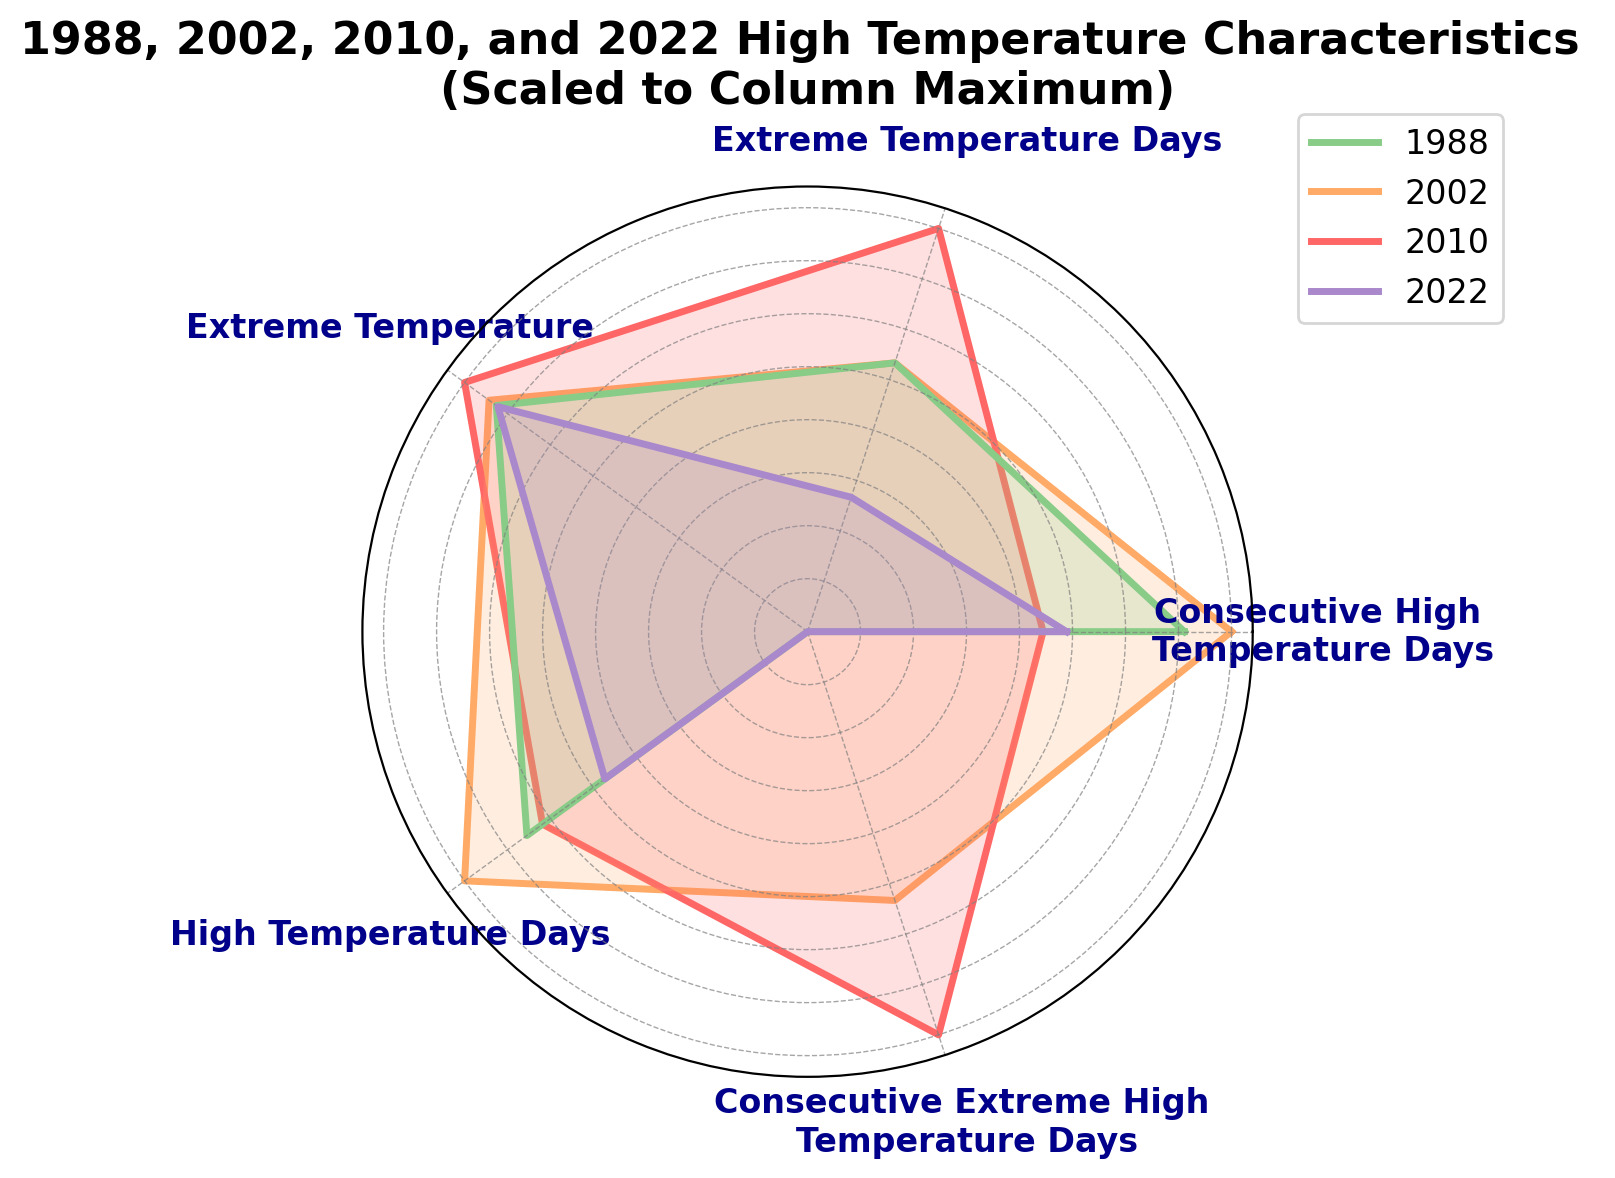

In [44]:
labels = ['Consecutive High \nTemperature Days', 'Extreme Temperature Days', 'Extreme Temperature', 
          'High Temperature Days', 'Consecutive Extreme High \nTemperature Days']
data_1988 = [16.0, 2, 35.61, 18, 0.0]
data_2002 = [18.0, 2, 36.44, 22, 2.0]
data_2010 = [10.0, 3, 39.24, 17, 3.0]
data_2022 = [11.0, 1, 35.43, 13, 0.0]

data_matrix = np.array([data_1988, data_2002, data_2010, data_2022])

max_values = np.max(data_matrix, axis=0)
scaled_data_1988 = (np.array(data_1988) / max_values) * 40
scaled_data_2002 = (np.array(data_2002) / max_values) * 40
scaled_data_2010 = (np.array(data_2010) / max_values) * 40
scaled_data_2022 = (np.array(data_2022) / max_values) * 40

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
scaled_data_1988 = np.concatenate((scaled_data_1988, [scaled_data_1988[0]]))
scaled_data_2002 = np.concatenate((scaled_data_2002, [scaled_data_2002[0]]))
scaled_data_2010 = np.concatenate((scaled_data_2010, [scaled_data_2010[0]]))
scaled_data_2022 = np.concatenate((scaled_data_2022, [scaled_data_2022[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12,6), dpi=100, subplot_kw=dict(polar=True))

ax.plot(angles, scaled_data_1988, color='#88CC88', linewidth=2.5, label='1988',zorder = 1)
ax.plot(angles, scaled_data_2002, color='#FFAA66', linewidth=2.5, label='2002',zorder = 0)
ax.plot(angles, scaled_data_2010, color='#FF6666', linewidth=2.5, label='2010',zorder = 0)
ax.plot(angles, scaled_data_2022, color='#AA88CC', linewidth=2.5, label='2022',zorder = 2)

ax.fill(angles, scaled_data_1988, color='#88CC88', alpha=0.2,zorder = 1)
ax.fill(angles, scaled_data_2002, color='#FFAA66', alpha=0.2,zorder = 0)
ax.fill(angles, scaled_data_2010, color='#FF6666', alpha=0.2,zorder = 0)
ax.fill(angles, scaled_data_2022, color='#AA88CC', alpha=0.2,zorder = 2)

ax.set_yticklabels([], zorder = 4)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12, fontweight='bold', color='darkblue')
ax.tick_params(axis='x', pad=15)

ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

plt.title("1988, 2002, 2010, and 2022 High Temperature Characteristics \n(Scaled to Column Maximum)", 
          fontsize=16, fontweight='bold', pad=30, color='k')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12, frameon=True, fancybox=True, framealpha=0.8)

plt.tight_layout()
plt.show()

<p style="font-size: 18px;">This radar chart presents high temperature characteristics for the years 1988, 2002, 2010, and 2022. It shows the number of extreme temperature days, consecutive extreme high temperature days, consecutive high temperature days, and high temperature days. The outer-most ring represents the maximum scaled value for each metric.</p>

## Conclusion

<p style="font-size: 18px;">
Based on the temperature analysis, New York exhibits a relatively mild climate pattern, particularly in recent years, with no clear upward trend in the number of high-temperature days. However, extreme record-high temperatures have been surpassed in recent decades. While neither high temperatures nor record highs show a significant increasing trend, there is a noticeable rise in record low temperatures over the past 40 years. This suggests that New York is experiencing the impacts of global warming, as minimum temperatures continue to rise.